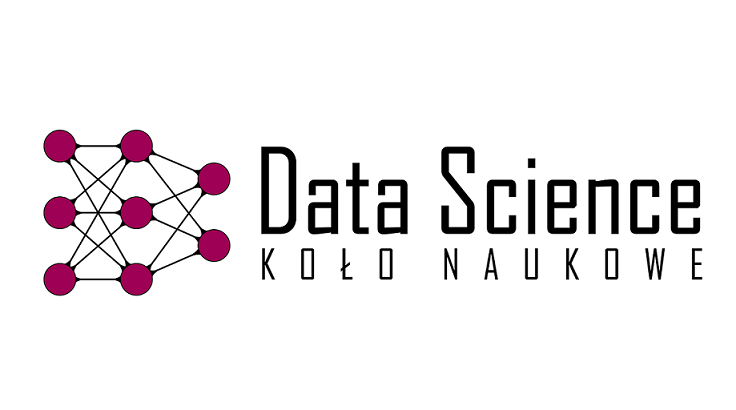

# EDA Notebook for the Recruitment Task
Hoang Thien Ly - BSc Student, major in Mathematics & Data Analysis, MiNI PW

##  **Introductory Problem**
In urban areas, the problem of reducing traffic congestion, noise and air pollution has never been given that much concern from citizens. And in one of the effort from goverments around the globe, the bike sharing service has sprung up as a shining candidate to alternate for motorized transportations.

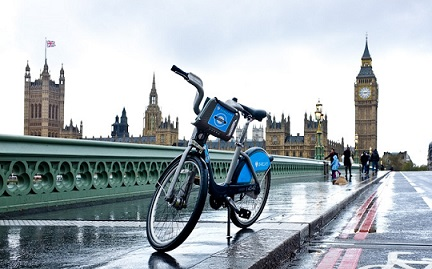

We will start to X-ray how this bike sharing system works in London, and seek out for insights to deeper understand behaviours of users to enhance the effectiveness of this idea.

## **Dataset:**
The data set is taken from: [London Bike sharing dataset](https://www.kaggle.com/)





In [99]:
# Import libraries:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import LabelEncoder 

from pandas import DatetimeIndex

In [100]:
from google.colab import files
uploaded = files.upload()

Saving london_merged.csv to london_merged (3).csv


In [101]:
url = "london_merged.csv"
df  = pandas.read_csv(url, header = 0)

### Feature explanations:

#### **Features**
*   timestamp - timestamp field for grouping the data
*   cnt - the count of a new bike shares
*   t1 - real temperature in C
*   t2 - temperature in C “feels like”
*   hum - humidity in percentage
*   wind_speed - wind speed in km/h
*   weather_code - category of the weather
*   is_holiday -  1 holiday / 0 non holiday
*   is_weekend -  1 if the day is weekend
*   season - category  seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with fog

* 2 = few clouds

* 3 = Broken clouds

* 4 = Cloudy

* 7 = Light rain

* 10 = rain with thunderstorm

* 26 = snowfall

* 94 = Freezing Fog

### Quick glimpse, Dimensionality

In [102]:
# Taking a look at some first rows in df:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [103]:
print("The data is collected from 04.01.2015 -> 03.01.2017, which is 2 years")
print("Data has:",df.shape[0], "rows and", df.shape[1],"columns")

The data is collected from 04.01.2015 -> 03.01.2017, which is 2 years
Data has: 17414 rows and 10 columns


### Checking missing values/ duplications:


In [106]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [107]:
df.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0        False
1        False
2        False
3        False
4        False
         ...  
17409    False
17410    False
17411    False
17412    False
17413    False
Length: 17414, dtype: bool>

## **Exploratory Data Analysis:**

### Barplot the number of rented bike on Seasons in 2 years:



In [108]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df= df.set_index('timestamp')
df['year_month'] = df.index.strftime('%Y-%m')

In [109]:
df["year_month_day"] = df.index.strftime('%Y-%m-%d')

In [110]:
df['hour'] = df.index.hour

In [111]:
# Encode a new column in dataframe:
df['season_encoded'] = df['season'].replace({0: "Spring",1: "Summer", 2:"Fall", 3: "Winter"})


In [112]:
# Creating barplot on the number of new bike shares on Seasons in 2 years:
figure = px.bar(df, x="season_encoded", 
                                    y = "cnt", 
                                    color = 'season_encoded',
                                    hover_data = df[['year_month_day']],
                                    labels = {'season_encoded':"Season", 'cnt' : 'Number of Rented Bikes',"season_encoded": "Season"},
                                    category_orders={"season_encoded": ["Summer", "Fall", "Spring", "Winter"]},
                                    title="Number of rented bikes according to seasons from 04.01.2015 to 03.01.2017")
figure.update_layout(xaxis= {'categoryorder':"total descending"})
figure.show()

**Recap**

* In 2 years, the number of renting time of bikes in the summers is approximately: 6.1 times.
* Number of rented bikes has a tendency to increase in the summer and decrease in the winter.






### Scatter plot for number of rented bike by months in 2 years:

In [113]:
fig = px.scatter(df, x= "year_month", 
                                    y = "cnt",
                                    hover_data= df[['year_month_day']],
                                    labels = {'year_month':"Month", 'cnt' : 'Number of rented bikes'},
                                    title = "Number of rented bike by months from 04.01.2015 to 03.01.2017")

fig.show()

**Recap**: Once again, this scatter chart double-checks our assumption on the relation between number of rented bikes and moment in the years

* During summer months, there is higher demand of renting bike.
* During winter months, this demand lessen drastically.

### Renting bikes by Hours:

In [114]:
df["is_weekend"] = df["is_weekend"].astype(str)
color_discrete_map = {'1.0': 'rgba(247,255,0,0.6)', '0.0': 'rgba(35,35,208,0.2)'}
fig = px.scatter(df, x = "hour",
                                    y = "cnt",
                                    labels = {'cnt' : 'Number of Bike Share','is_weekend' : "Weekend"},
                                    color = "is_weekend", color_discrete_map=color_discrete_map)
fig.show()

**Recap:** The interactable legend allows us for a clearer observation on the behaviour of users:


*   In the weekend: the rushing hours of using service is from 13:00 to 19:00, while in the week day, the peaking time is in 2 main frames: 7:00 to 9:00 and 16:00 to 19:00 (overlapping the working and school hours).
*   The is a hilarious observation: from 0:00 to 4:00, the time of using bike share service in the weekend is much higher than in the weekday. One of my personal hypothesis, in the midnight in the weekend, someone needs to ride (since they cannot drive) to home :").






# Outro - ending line of my presentation :D